In [1]:
## 1- Preparacion de los datos
import pandas as pd

# 1.1- Carga desde fichero y mostrar estadisticas
X = pd.read_csv('./dataset_churn_all.csv', index_col=0)

# Valores vacios se eliminan, leer README.md
X = X.loc[(X['TotalCharges']!=' ')]
X['Churn'].replace(['No','Yes'],[0,1], inplace=True)

print(X.describe())

       SeniorCitizen       tenure  MonthlyCharges        Churn
count    7032.000000  7032.000000     7032.000000  7032.000000
mean        0.162400    32.421786       64.798208     0.265785
std         0.368844    24.545260       30.085974     0.441782
min         0.000000     1.000000       18.250000     0.000000
25%         0.000000     9.000000       35.587500     0.000000
50%         0.000000    29.000000       70.350000     0.000000
75%         0.000000    55.000000       89.862500     1.000000
max         1.000000    72.000000      118.750000     1.000000


In [2]:
# 1.2 - Transformar variables tipo categoria a numericas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])

In [3]:
#2- Dividir la muestra en entrenamiento con 90% y prueba 10%
X1 = X.iloc[:int(len(X)*0.9)]
X2 = X.iloc[int(len(X)*0.1)*-1:]
X_train = X1.drop(['Churn'], axis=1)
X_test  = X2.drop(['Churn'], axis=1)

y_train = X1['Churn']
y_test  = X2['Churn']

In [4]:
# RandomForest, con parametros ajustados
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

rf = RandomForestClassifier(n_estimators=300, class_weight={1:10, 0:1}, max_depth=15, max_features=5, 
	min_samples_split=2, min_samples_leaf=2,random_state=42)
rf.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
predictions = rf.predict(X_test)
f1_rf = f1_score(y_test,predictions)
roc_auc_rf = roc_auc_score(y_test,predictions)

In [5]:
# GradientBoosting, con parametros ajustados
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=19,min_samples_leaf=2, random_state=42)
gb.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
gb_predictions = gb.predict(X_test)
f1_gb = f1_score(y_test,gb_predictions)
roc_auc_gb = roc_auc_score(y_test,gb_predictions)

In [6]:
# MLPClassifier, con parametros ajustados
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=50, solver='adam', random_state=42)
mlp.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
mlp_predictions = mlp.predict(X_test)
f1_mlp = f1_score(y_test,mlp_predictions)
roc_auc_mlp = roc_auc_score(y_test,mlp_predictions)

In [7]:
# SVC, con parametros ajustados
from sklearn.svm import SVC
svm = SVC(C=3, gamma=0.01, kernel='rbf', random_state=42)
svm.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
svm_predictions = svm.predict(X_test)
f1_svm = f1_score(y_test,svm_predictions)
roc_auc_svm = roc_auc_score(y_test,svm_predictions)

In [16]:
# LogisticRegression modelo con parametros ajustados
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={ 0:1, 1:4}, solver='liblinear', random_state=42)
lr.fit(X_train,y_train)

#Calculo las predicciones con el conjunto de prueba X_test
lr_predictions = lr.predict(X_test)
f1_lr = f1_score(y_test,lr_predictions)
roc_auc_lr = roc_auc_score(y_test,lr_predictions)


[[ 4.13392386e-04  2.16504054e-01  4.21038404e-02 -1.69508753e-01
  -5.04789808e-02 -1.01040458e+00  5.10164278e-02  2.38437928e-01
  -2.46832179e-01 -1.42654029e-01 -8.06261458e-02 -2.64171781e-01
   2.41427452e-02  1.90737889e-03 -7.77115400e-01  3.67413991e-01
   5.88515905e-02  2.35589351e-02  2.42597138e-04]]


In [9]:
# Crear el dataframe con las metricas f1
df = pd.DataFrame({
    'Modelo' : ['RandomFor.', 'GradientBoost.', 'MLPClassifier', 'SVC', 'RegressionLog.'],
    'f1': [f1_rf, f1_gb, f1_mlp, f1_svm, f1_lr],
     'roc_auc': [roc_auc_rf,roc_auc_gb, roc_auc_mlp, roc_auc_svm, roc_auc_lr]
})

#imprimir tabla
print(df)

           Modelo        f1   roc_auc
0      RandomFor.  0.605201  0.729780
1  GradientBoost.  0.604230  0.720977
2   MLPClassifier  0.555911  0.692565
3             SVC  0.511494  0.665213
4  RegressionLog.  0.629423  0.763058


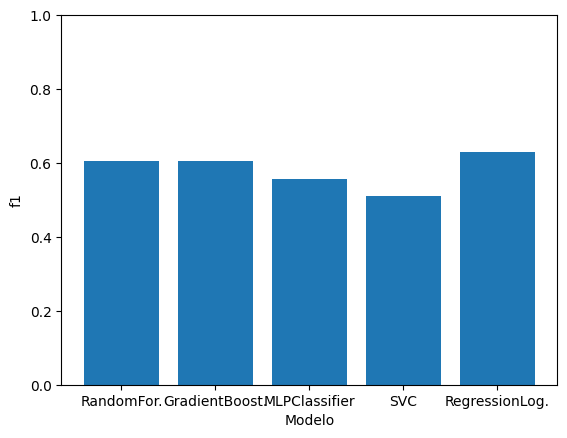

In [10]:
# Graficar resultados
import matplotlib.pyplot as plt
plt.bar(df['Modelo'],df['f1'])
plt.ylim([0,1])
plt.xlabel('Modelo')
plt.ylabel('f1')
#plt.Title('Comparacion de modelos por f1')
plt.show()

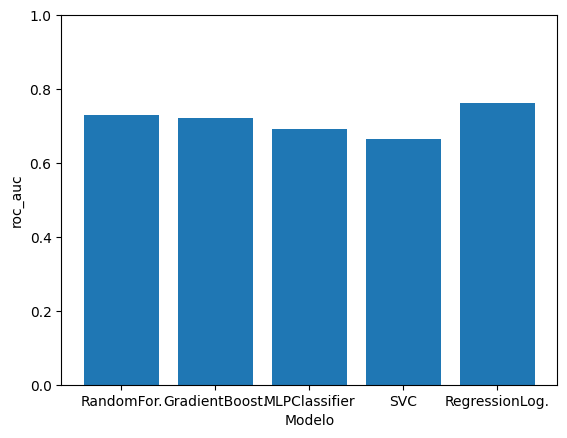

In [18]:
# Graficar resultados
import matplotlib.pyplot as plt
plt.bar(df['Modelo'],df['roc_auc'])
plt.ylim([0,1])
plt.xlabel('Modelo')
plt.ylabel('roc_auc')
#plt.Title('Comparacion de modelos por roc_auc')
plt.show()

In [17]:
#Imprimir variables mas relevante en la clasificacion
importances = rf.feature_importances_
df_importance = pd.DataFrame({'variable': X_train.columns, 'importancia': importances})
df_importance = df_importance.sort_values('importancia', ascending=False)
print(df_importance.head(20))
print(lr.coef_)

            variable  importancia
14          Contract     0.170747
17    MonthlyCharges     0.159277
18      TotalCharges     0.154168
4             tenure     0.151599
8     OnlineSecurity     0.053782
11       TechSupport     0.045133
16     PaymentMethod     0.044922
7    InternetService     0.035698
15  PaperlessBilling     0.021422
9       OnlineBackup     0.021016
0             gender     0.021005
13   StreamingMovies     0.019183
6      MultipleLines     0.018310
3         Dependents     0.017627
2            Partner     0.016953
10  DeviceProtection     0.016598
12       StreamingTV     0.015608
1      SeniorCitizen     0.012041
5       PhoneService     0.004911
[[ 4.13392386e-04  2.16504054e-01  4.21038404e-02 -1.69508753e-01
  -5.04789808e-02 -1.01040458e+00  5.10164278e-02  2.38437928e-01
  -2.46832179e-01 -1.42654029e-01 -8.06261458e-02 -2.64171781e-01
   2.41427452e-02  1.90737889e-03 -7.77115400e-01  3.67413991e-01
   5.88515905e-02  2.35589351e-02  2.42597138e-04]]
